<h1> <center> <b> CandyShop </b> </center> </h1>
<b> <h3> Company Introduction : </h3> </b>
Your client for this project is a Candy Selling Company.

This company sells a large variety of candies worldwide.
They want to supply the highest quality of candies which most people will prefer to receive on halloween.
To find the most popular candy, they need to analyze different characteristics of the candy as per the data collected through the survey.

Current Scenario
It is very tough to know the candies preferred by people to receive on Halloween.
Currently, they estimate the popularity of candies based on their previous sales but this does not give the ideal results.

<h3> <b> Problem Statement : </b> </h3>
The current process suffers from the following problems:

The popularity of candies derived from the previous sales records is not an ideal estimate of actual popularity.
The sales can also be affected by bulk orders as well and this might not give us the actual popularity.

The company has hired you as data science consultants.

They want to automate the process of predicting the winning percentage of halloween candies which people would prefer to receive.

## Dataset Feature Description

<table>	<th>	Column Name	</th>	<th>	Description	</th>
<tr>	<td>	competitorname	</td>	<td>	Name of competitor candy	</td>
<tr>	<td>	chocolate	</td>	<td>	Does it contain chocolate?	</td>
<tr>	<td>	fruity	</td>	<td>	Is it fruit flavored?	</td>
<tr>	<td>	caramel	</td>	<td>	Is there caramel in the candy?	</td>
<tr>	<td>	peanutalmondy	</td>	<td>	Does it contain peanuts, peanut butter or almonds?	</td>
<tr>	<td>	nougat	</td>	<td>	Does it contain nougat?	</td>
<tr>	<td>	crispedricewafer	</td>	<td>	Does it contain crisped rice, wafers, or a cookie component?	</td>
<tr>	<td>	hard	</td>	<td>	Is it a hard candy?	</td>
<tr>	<td>	bar	</td>	<td>	Is it a candy bar?	</td>
<tr>	<td>	pluribus	</td>	<td>	Is it one of many candies in a bag or box?	</td>
<tr>	<td>	sugarpercent	</td>	<td>	The percentile of sugar it falls under within the data set	</td>
<tr>	<td>	pricepercent	</td>	<td>	The unit price percentile compared to the rest of the set	</td>
<tr>	<td>	winpercent	</td>	<td>	The overall win percentage	</td>
</table>

In [9]:
## Importing Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import profile_report

In [3]:
# Sklearn Libraries
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [5]:
train_data = pd.read_csv('candy_train.csv')
print(train_data.shape)
train_data.head()

(68, 13)


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,Sugar Daddy,0,0,1,0,0,0,0,0,0,0.418,0.325,32.230995
1,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.965,0.860,64.353340
2,Dots,0,1,0,0,0,0,0,0,1,0.732,0.511,42.272076
3,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
4,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140


In [6]:
test_data = pd.read_csv('candy_test.csv')
print(test_data.shape)
test_data.head()

(17, 12)


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
0,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325
1,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116
2,Haribo Happy Cola,0,0,0,0,0,0,0,0,1,0.465,0.465
3,Mounds,1,0,0,0,0,0,0,1,0,0.313,0.860
4,Nerds,0,1,0,0,0,0,1,0,1,0.848,0.325


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    68 non-null     object 
 1   chocolate         68 non-null     int64  
 2   fruity            68 non-null     int64  
 3   caramel           68 non-null     int64  
 4   peanutyalmondy    68 non-null     int64  
 5   nougat            68 non-null     int64  
 6   crispedricewafer  68 non-null     int64  
 7   hard              68 non-null     int64  
 8   bar               68 non-null     int64  
 9   pluribus          68 non-null     int64  
 10  sugarpercent      68 non-null     float64
 11  pricepercent      68 non-null     float64
 12  winpercent        68 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 7.0+ KB


In [8]:
train_data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.455882,0.441176,0.191176,0.191176,0.102941,0.102941,0.147059,0.294118,0.485294,0.474632,0.496603,51.531087
std,0.501753,0.500219,0.396151,0.396151,0.306141,0.306141,0.356798,0.459033,0.503500,0.278968,0.285002,14.768819
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.034000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.276000,40.810833
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.465000,0.511000,51.344505
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.732000,0.767000,62.484646
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,81.866257


In [10]:
# Profiling of the Data
#PR = train_data.profile_report(title = 'PR',progress_bar=False)
#PR.to_file('PR.html')

### Profiling of the Data

### Dataset statistics

- Number of variables	13
- Number of observations	68
- Missing cells	0

#### Variable Types
- Categorical	1
- Numeric	12

#### Feature Information

- 1 - Competitor Name - Unique Values
- 2 - Chocolate - 0 - 37 , 1- 31
- 3 - Fruity - 0 - 38, 1 - 30
- 4 - Caramel - 0 - 55, 1 - 13
- 5 - PeanutyAlmondy -  0 -55, 1 -13
- 6 - Nougat - 0- 61 ,1- 7
- 7 - CrispeDriceWater - 0 - 61,1 - 7
- 8 - Hard -  0 - 58,1 - 10
- 9 - Bar- 0 - 48, 1 - 20
- 10 - Pluribus - 0 - 35 ,1 -33
- 11 - SugarPercent - Almost Normally Distributed ,Range - 0.97, Mean - 0.47
- 12 - PricePercent - Almost Normally Distributed ,Range - 0.94, Mean - 0.49
- 13 - <b> WinPercent </b> - Target Variable

### Exploratory Data Analysis

In [19]:
train_data.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

### Q1 -  What is the Distribution of the All the Binary variables


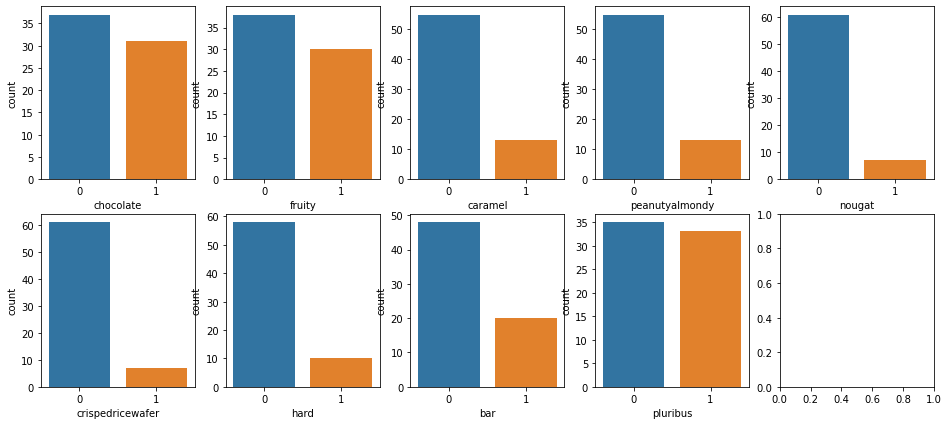

In [38]:
f,axes = plt.subplots(2,5,figsize=(16,7))
sns.countplot(train_data['chocolate'],ax=axes[0,0])
sns.countplot(train_data['fruity'],ax=axes[0,1])
sns.countplot(train_data['caramel'],ax=axes[0,2])
sns.countplot(train_data['peanutyalmondy'],ax=axes[0,3])
sns.countplot(train_data['nougat'],ax=axes[0,4])
sns.countplot(train_data['crispedricewafer'],ax=axes[1,0])
sns.countplot(train_data['hard'],ax=axes[1,1])
sns.countplot(train_data['bar'],ax=axes[1,2])
sns.countplot(train_data['pluribus'],ax=axes[1,3]);

### Insights - 1) Chocolate, Fruity and Pluribus are mostly equall in the dataset. Rest everyone have very in limited number

### Q2 - What is the Relationship of all Binary Variable with all the TargetVariables

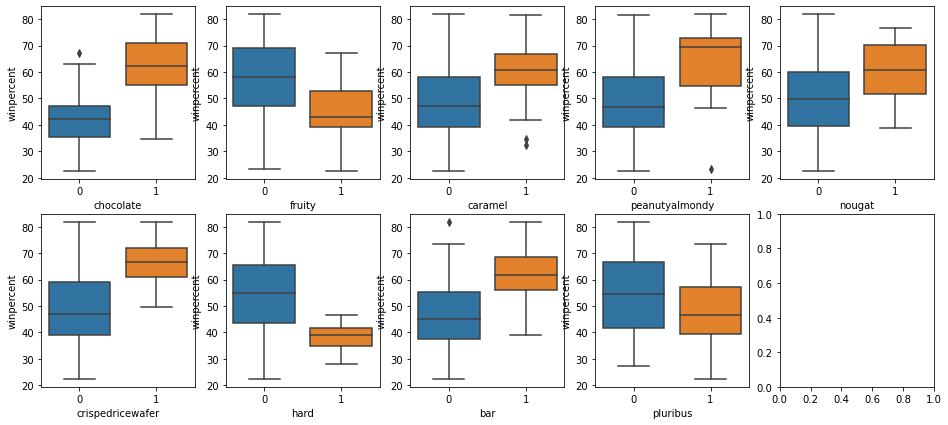

In [37]:
f,axes = plt.subplots(2,5,figsize=(16,7))
sns.boxplot(data=train_data, x='chocolate', y='winpercent',ax=axes[0,0])
sns.boxplot(data=train_data, x='fruity', y='winpercent',ax=axes[0,1])
sns.boxplot(data=train_data, x='caramel', y='winpercent',ax=axes[0,2])
sns.boxplot(data=train_data, x='peanutyalmondy', y='winpercent',ax=axes[0,3])
sns.boxplot(data=train_data, x='nougat', y='winpercent',ax=axes[0,4])
sns.boxplot(data=train_data, x='crispedricewafer', y='winpercent',ax=axes[1,0])
sns.boxplot(data=train_data, x='hard', y='winpercent',ax=axes[1,1])
sns.boxplot(data=train_data, x='bar', y='winpercent',ax=axes[1,2])
sns.boxplot(data=train_data, x='pluribus', y='winpercent',ax=axes[1,3]);


#### Insights - 1) Winpercent is lower when chocolate is hard, fruity and almost equal when it has pluribus. 2) Winpercent is all above 50% when chocolate has Crispedrice water peanuty almondy

### Q3 - Distribution of Continous Variable with Target Variable

<AxesSubplot:xlabel='sugarpercent', ylabel='winpercent'>

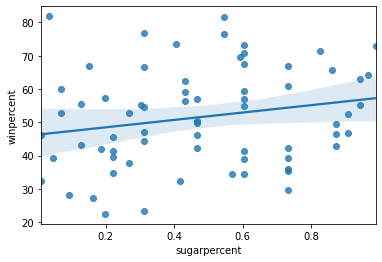

In [40]:
sns.regplot(data=train_data, x='sugarpercent',y='winpercent')

<AxesSubplot:xlabel='pricepercent', ylabel='winpercent'>

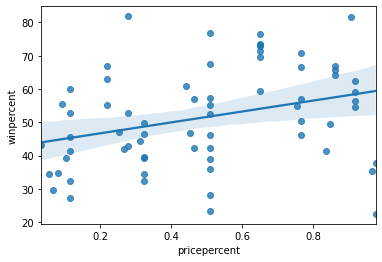

In [44]:
sns.regplot(data=train_data, x='pricepercent',y='winpercent')

### Q4 -  What is the Correlation of the data with Target Variable

In [48]:
train_data.corr()['winpercent']

chocolate           0.645048
fruity             -0.427243
caramel             0.253867
peanutyalmondy      0.351217
nougat              0.196895
crispedricewafer    0.338276
hard               -0.386572
bar                 0.459586
pluribus           -0.221992
sugarpercent        0.209999
pricepercent        0.316731
winpercent          1.000000
Name: winpercent, dtype: float64

In [60]:
# Splitting the Data into X and y
X = train_data.drop(['competitorname','winpercent'],axis=1)
y=train_data['winpercent']
print(X.shape,y.shape)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(68, 11) (68,)
(54, 11) (14, 11) (54,) (14,)


In [61]:
#Scaling the Data
SS=StandardScaler()
X_train[X_train.columns] = SS.fit_transform(X_train)
X_test[X_test.columns] = SS.transform(X_test)
X_test.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
46,1.077033,-0.894427,2.236068,2.097618,3.130495,-0.319438,-0.417029,1.541104,-1.118034,0.279020,0.550345
16,1.077033,-0.894427,-0.447214,-0.476731,-0.319438,3.130495,-0.417029,1.541104,-1.118034,-0.143967,1.501426
4,-0.928477,1.118034,-0.447214,-0.476731,-0.319438,-0.319438,-0.417029,-0.648886,0.894427,1.719363,-0.984921
9,1.077033,-0.894427,-0.447214,-0.476731,3.130495,-0.319438,-0.417029,1.541104,-1.118034,0.490513,0.051650
28,1.077033,-0.894427,-0.447214,-0.476731,-0.319438,3.130495,-0.417029,-0.648886,0.894427,1.467759,1.252079


In [81]:
# Selection the relevant columns using Selectfrom model option
selector = SelectFromModel(LinearRegression())
selector.fit(X_train,y_train)
selector_feat= X_train.columns[selector.get_support()].to_list()
print(selector_feat)
print(np.round(selector.threshold_,decimals=2))

['chocolate', 'fruity', 'crispedricewafer', 'hard']
2.87


In [84]:
# Selection the relevant columns using Selectfrom model option
selector = SelectFromModel(DecisionTreeRegressor())
selector.fit(X_train,y_train)
selector_feat= X_train.columns[selector.get_support()].to_list()
print(selector_feat)
print(np.round(selector.threshold_,decimals=2))

['chocolate', 'sugarpercent', 'pricepercent']
0.09


In [64]:
# Selection the relevant columns using Selectfrom model option
selector = SelectFromModel(RandomForestRegressor())
selector.fit(X_train,y_train)
selector_feat= X_train.columns[selector.get_support()].to_list()
print(selector_feat)
print(np.round(selector.threshold_,decimals=2))

['chocolate', 'sugarpercent', 'pricepercent']
0.09


In [68]:
### 1 - Linear Regression
LR = LinearRegression()
LR.fit(X_train,y_train)
LR_pred_train = LR.predict(X_train)
LR_pred_test = LR.predict(X_test)
## Model Error Check
print(np.sqrt(mean_squared_error(LR_pred_train,y_train)))
print(np.sqrt(mean_squared_error(LR_pred_test,y_test)))

9.55660662791369
13.343482009493687


In [69]:
### 2 - Decision Tree Regressor
DT= DecisionTreeRegressor()
DT.fit(X_train,y_train)
DT_pred_train = DT.predict(X_train)
DT_pred_test =3 DT.predict(X_test)
## Model Error Check
print(np.sqrt(mean_squared_error(DT_pred_train,y_train)))
print(np.sqrt(mean_squared_error(DT_pred_test,y_test)))

1.7197739976304003
16.421999767055983


In [71]:
###  - Random Forest Regressor
RF= RandomForestRegressor()
RF.fit(X_train,y_train)
RF_pred_train = RF.predict(X_train)
RF_pred_test = RF.predict(X_test)
## Model Error Check
print(np.sqrt(mean_squared_error(RF_pred_train,y_train)))
print(np.sqrt(mean_squared_error(RF_pred_test,y_test)))

4.959164945233141
12.372687702959889


In [93]:
X1_train = X_train[selector_feat]
X1_test = X_test[selector_feat]

###  - Random Forest Regressor
RF= RandomForestRegressor()
RF.fit(X1_train,y_train)
RF_pred_train = RF.predict(X1_train)
RF_pred_test = RF.predict(X1_test)
## Model Error Check
print(np.sqrt(mean_squared_error(RF_pred_train,y_train)))
print(np.sqrt(mean_squared_error(RF_pred_test,y_test)))

4.967988221569313
10.372339073523435


### Working on the Test Data

In [94]:
test_data1 = test_data.copy()

In [96]:
test_data1.drop('competitorname',axis=1,inplace=True)

In [97]:
test_data1[test_data1.columns] = SS.transform(test_data1)

In [98]:
test_data1.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
0,-0.928477,1.118034,-0.447214,-0.476731,-0.319438,-0.319438,-0.417029,-0.648886,0.894427,-1.544199,-0.610900
1,-0.928477,1.118034,-0.447214,-0.476731,-0.319438,-0.319438,2.397916,-0.648886,-1.118034,-1.372816,-1.355380
2,-0.928477,-0.894427,-0.447214,-0.476731,-0.319438,-0.319438,-0.417029,-0.648886,0.894427,-0.016341,-0.112206
3,1.077033,-0.894427,-0.447214,-0.476731,-0.319438,-0.319438,-0.417029,1.541104,-1.118034,-0.570600,1.294824
4,-0.928477,1.118034,-0.447214,-0.476731,-0.319438,-0.319438,2.397916,-0.648886,0.894427,1.380244,-0.610900


In [99]:
test_data1 = test_data1[selector_feat]

In [101]:
test_data1.head()

,chocolate,sugarpercent,pricepercent
0,-0.928477,-1.544199,-0.610900
1,-0.928477,-1.372816,-1.355380
2,-0.928477,-0.016341,-0.112206
3,1.077033,-0.570600,1.294824
4,-0.928477,1.380244,-0.610900


In [102]:
pred_values_test = RF.predict(test_data1)

In [105]:
FinalOP = pd.DataFrame(test_data['competitorname'])

In [106]:
FinalOP['winpercent'] = pred_values_test

In [109]:
FinalOP.to_csv('submission.csv',index=False,header=False)

In [ ]:
fin